# Adidas vs Nike
https://www.kaggle.com/kaushiksuresh147/adidas-vs-nike

<img src="logo.JPG" alt="" height="250px" align="center"/>



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('Adidas Vs Nike.csv')

print(dataset.shape)

(3268, 10)


In [4]:
dataset.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


## Matriz de correlación y pairplot

C:\Users\susan\AppData\Local\Temp\ipykernel_7892\1318979753.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(dataset.corr(), square=True, annot=True)


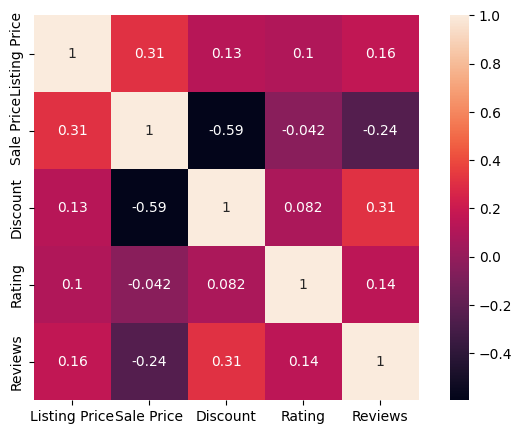

In [5]:
plt.figure(figsize=(8,5))
ax = sns.heatmap(dataset.corr(), square=True, annot=True)         
plt.show()

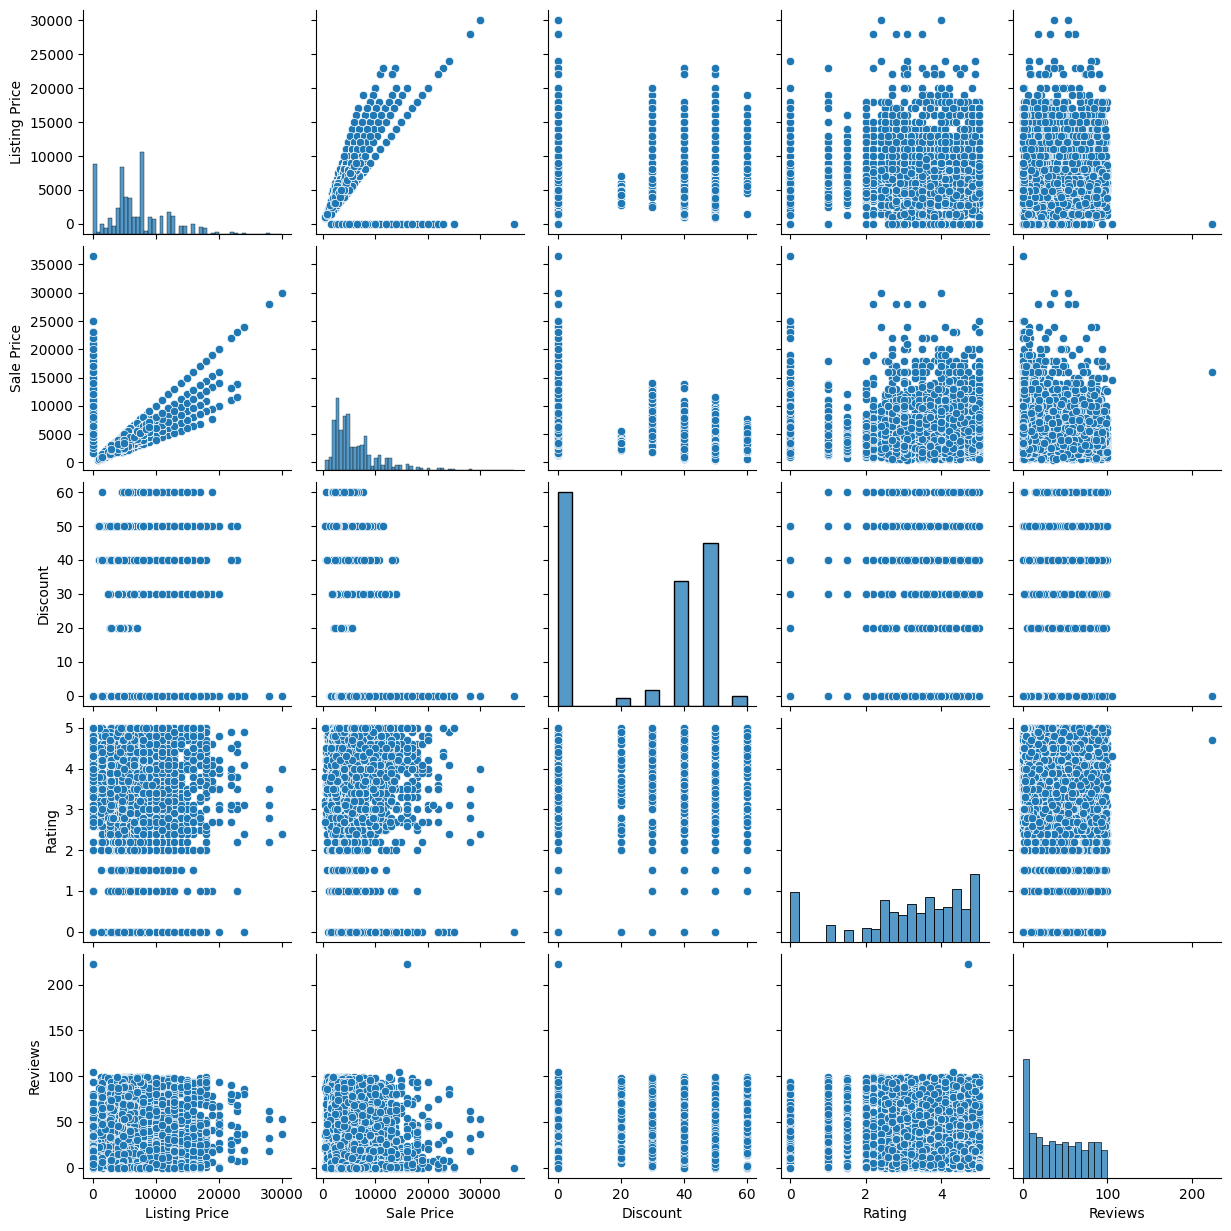

In [6]:
sns.pairplot(dataset)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


In [8]:
columnas = dataset.columns
print(columnas)

Index(['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount',
       'Brand', 'Description', 'Rating', 'Reviews', 'Last Visited'],
      dtype='object')


## Data Cleaning and Pre Processing

#### Mirar si el dataset tiene valores nan

In [9]:
print(dataset.isnull().sum())

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      3
Rating           0
Reviews          0
Last Visited     0
dtype: int64


#### Solo hay 3 valores nulls en mi dataset, considero que con eliminar las 3 filas que lo contienen es suficiente. No perderé información.

In [10]:
dataset.fillna("", inplace=True)
print(dataset.isnull().sum())

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      0
Rating           0
Reviews          0
Last Visited     0
dtype: int64


In [11]:
dataset['Discount'].unique()

array([50, 40, 60,  0, 30, 20], dtype=int64)

In [12]:
dataset['Brand'].unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

#### Hay dos nombres de marcas diferentes para referirse a la misma, debe ser un error. Lo modifico para que se agrupen en una sola marca --> Adidas ORIGINALS 

In [13]:
dataset = dataset.replace('Adidas Adidas ORIGINALS', 'Adidas ORIGINALS')

#### Modifico el atributo Last Visited para que este en formato fecha, ya que esta en formato 'object'

In [14]:
dataset['Last Visited'] = pd.to_datetime(dataset['Last Visited'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Product Name   3268 non-null   object        
 1   Product ID     3268 non-null   object        
 2   Listing Price  3268 non-null   int64         
 3   Sale Price     3268 non-null   int64         
 4   Discount       3268 non-null   int64         
 5   Brand          3268 non-null   object        
 6   Description    3268 non-null   object        
 7   Rating         3268 non-null   float64       
 8   Reviews        3268 non-null   int64         
 9   Last Visited   3268 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 255.4+ KB


#### En el atributo Listing price hay valores 0 
##### Como podemos ver, el min de los atributos Listing Price es 0, esto debe de ser un error

In [15]:
dataset.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


In [16]:
boolean_condition = dataset['Listing Price'] == 0
Column_Name ='Listing Price'
new_value = dataset['Sale Price']
dataset.loc[boolean_condition, Column_Name] = new_value

dataset.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,8330.619645,6134.265606,26.875765,3.242105,40.551714
std,4418.534069,4293.247581,22.633487,1.428856,31.543491
min,899.000000,449.000000,0.000000,0.000000,0.000000
25%,4999.000000,2999.000000,0.000000,2.600000,10.000000
50%,7599.000000,4799.000000,40.000000,3.500000,37.000000
75%,10995.000000,7995.000000,50.000000,4.400000,68.000000
max,36500.000000,36500.000000,60.000000,5.000000,223.000000


#### Hay redundancias con la fecha, ya que todas son del mismo dia y se llevan de diferencia la más antigua y la mas reciente 36min 43seg

In [17]:
min_date = min(dataset['Last Visited'])
max_date = max(dataset['Last Visited'])

date_range = max_date - min_date
print("Last Visited Range is: " + str(date_range))

Last Visited Range is: 0 days 00:36:43


In [18]:
dataset['Minute'] = dataset['Last Visited'].dt.minute
dataset['Second'] = dataset['Last Visited'].dt.second


### Tratamiento variables continuas 

In [19]:
from sklearn.preprocessing import KBinsDiscretizer

for col in dataset.columns:

    if type(col) == 'float64' or type(col) == 'int64': 
        dataset[col] = KBinsDiscretizer(n_bins=11, encode='ordinal',
                                strategy = "kmeans").fit_transform(dataset[col])

### Tratamiento variables categóricas

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in dataset.columns:
    dataset[col] = le.fit_transform(dataset[col])
    
print(dataset.head())   

   Product Name  Product ID  Listing Price  Sale Price  Discount  Brand  \
0          1315          78             75         138         4      1   
1          1331        3097             49          73         4      1   
2          1458        1420              1           2         3      0   
3          1437         399             44          66         4      0   
4          1346        1742             52          79         4      1   

   Description  Rating  Reviews  Last Visited  Minute  Second  
0          220      29       41             0       0      14  
1           65      14       24             1       0      15  
2         1493       7       37             1       0      15  
3          600      22       35             1       0      15  
4         1641      16       72             1       0      15  


## EDA

#### Qué marca ofrece más descuento?

Text(0.5, 1.0, 'Descuentos ofrecidos por las marcas')

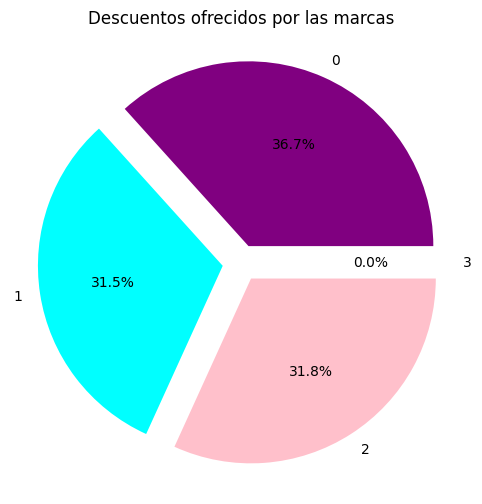

In [21]:
GroupedByBrands = dataset.groupby(dataset['Brand'])
mean = GroupedByBrands.mean()

plt.subplots(figsize = (10,6))
discount = np.array(mean.Discount)
label = mean.index
plt.pie(x = discount, autopct = "%.1f%%", explode = [0.10] * 4, labels = label, colors=("purple", "cyan", "pink"))
plt.title('Descuentos ofrecidos por las marcas')

#### Las diferentes submarcas de adidas ofrecen descuentos, a diferencia de nike que no ofrece ninguno

#### Ver la cantidad de artículos que venden estas dos marcas para ver si esta balanceado

Text(0.5, 1.0, 'Nº de artículos a la venta')

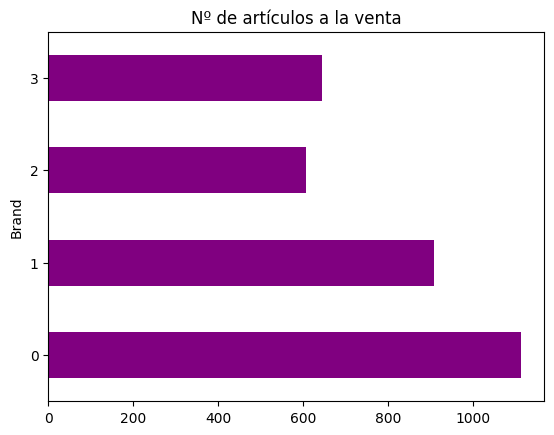

In [22]:
dataset.groupby('Brand')['Product Name'].count().plot.barh(color = "purple")
plt.title("Nº de artículos a la venta")


#### Podemos ver que de la marca Adidas ofrece muchos más productos que nike. A parte Adidas tiene 3 submarcas.

#### El número de muestras que tiene la base de datos de la marca Nike es mucho menor, esta desbalanceada y esto puede suponer un problema a la hora de analizar la bd.

In [23]:
GroupedByBrands = dataset.groupby(['Brand'])
Nike = GroupedByBrands.get_group(3)
Orginals = GroupedByBrands.get_group(1)
Neo = GroupedByBrands.get_group(3)
Sports = GroupedByBrands.get_group(2)
Frames = [Orginals, Neo, Sports]
Adidas = pd.concat(Frames)
Adidas.reset_index(inplace = True, drop = True)

### Productos que ofrece Adidas:

<AxesSubplot: title={'center': 'Productos ofrecidos por Adidas'}>

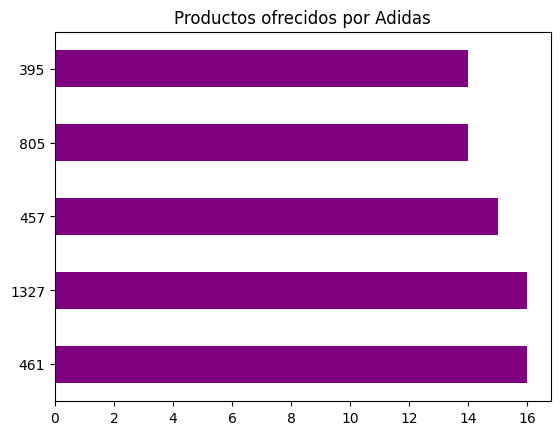

In [24]:

AdidasProducts = Adidas['Product Name'].value_counts().head().plot.barh(color = 'purple')
plt.title("Productos ofrecidos por Adidas")
AdidasProducts


### Productos que ofrece Nike:

<AxesSubplot: title={'center': 'Productos ofrecidos por Nike'}>

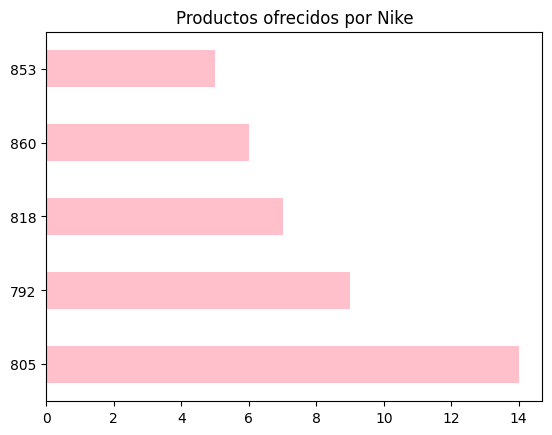

In [25]:
NikeProducts = Nike['Product Name'].value_counts().head().plot.barh(color = 'pink')
plt.title("Productos ofrecidos por Nike")
NikeProducts

#### Precio promedio de listado de Nike 

C:\Users\susan\AppData\Local\Temp\ipykernel_7892\3879835638.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Nike['Listing Price'],bins=10,color='pink')


Text(0.5, 1.0, 'Precio promedio de listado de Nike')

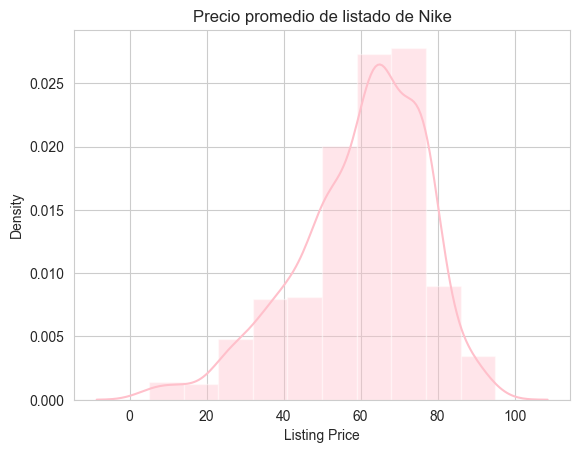

In [26]:
sns.set_style('whitegrid')
sns.distplot(Nike['Listing Price'],bins=10,color='pink')
plt.title("Precio promedio de listado de Nike")

C:\Users\susan\AppData\Local\Temp\ipykernel_7892\1764753231.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Nike['Sale Price'],bins=10,color='pink')


Text(0.5, 1.0, 'Precio de venta de Nike')

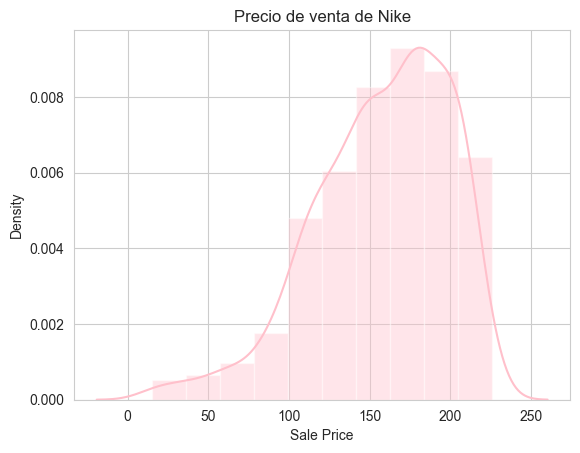

In [27]:
sns.set_style('whitegrid')
sns.distplot(Nike['Sale Price'],bins=10,color='pink')
plt.title("Precio de venta de Nike")

#### Precio promedio de listado de Adidas

C:\Users\susan\AppData\Local\Temp\ipykernel_7892\384346396.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Adidas['Listing Price'],bins=10,color='purple')


Text(0.5, 1.0, 'Precio promedio de listado de Adidas')

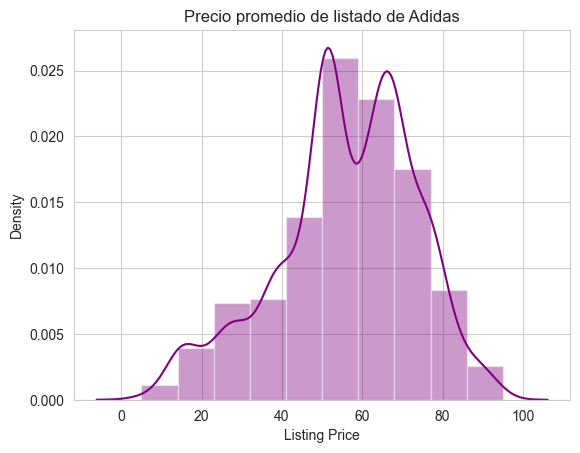

In [28]:
sns.set_style('whitegrid')
sns.distplot(Adidas['Listing Price'],bins=10,color='purple')
plt.title("Precio promedio de listado de Adidas")

C:\Users\susan\AppData\Local\Temp\ipykernel_7892\717086849.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Adidas['Sale Price'],bins=10,color='purple')


Text(0.5, 1.0, 'Precio de venta de Adidas')

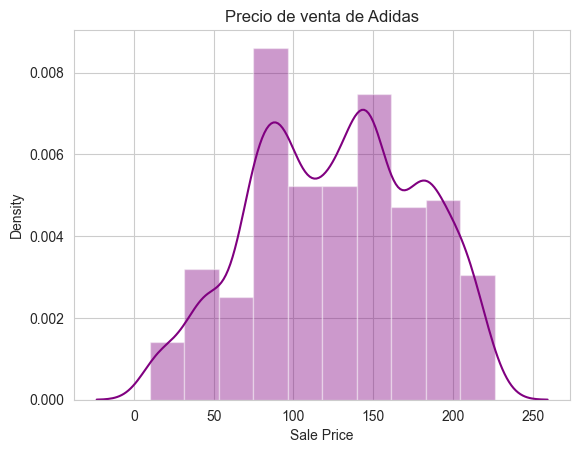

In [29]:
sns.set_style('whitegrid')
sns.distplot(Adidas['Sale Price'],bins=10,color='purple')
plt.title("Precio de venta de Adidas")

## Valoración y Reseñas de las dos marcas

#### Nike

In [30]:
Nike[['Rating','Reviews']].describe()

,Rating,Reviews
count,643.000000,643.000000
mean,15.234837,6.984448
std,12.840596,13.950728
min,0.000000,0.000000
25%,0.000000,0.000000
50%,19.000000,1.000000
75%,27.000000,6.000000
max,31.000000,101.000000


#### Adidas

In [31]:
Adidas[['Rating','Reviews']].describe()

,Rating,Reviews
count,2157.000000,2157.000000
mean,15.447844,36.550765
std,10.511443,31.702172
min,0.000000,0.000000
25%,5.000000,5.000000
50%,16.000000,30.000000
75%,25.000000,64.000000
max,31.000000,101.000000


In [32]:
dataset.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,Minute,Second
0,1315,78,75,138,4,1,220,29,41,0,0,14
1,1331,3097,49,73,4,1,65,14,24,1,0,15
2,1458,1420,1,2,3,0,1493,7,37,1,0,15
3,1437,399,44,66,4,0,600,22,35,1,0,15
4,1346,1742,52,79,4,1,1641,16,72,1,0,15


## Clasificación

### KNN

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np


#Y = dataset["Sale Price"].values
Y = dataset["Discount"].values
#X = dataset.drop(['Sale Price'], axis = 1).values
X = dataset.drop(['Discount'], axis = 1).values


# Holdout Set
X_train, X_aux, Y_train, Y_aux = train_test_split(X, Y, train_size=0.6)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_aux, Y_aux, test_size=0.5)

In [34]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

mean_error_for_k = []
template = "k={0}: {1} errores de clasificación de un total de {2}"

# Fitting the model
for k in range(1,21):
    kNN = KNeighborsClassifier(n_neighbors = k)
    kNN.fit(X_train, Y_train)

    # Predicting values
    Y_test_pred = kNN.predict(X_test)

    # Count the errors
    n_errors = sum(Y_test != Y_test_pred)
    print (template.format(k, n_errors, len(Y_test)))
    mean_error_for_k.append(n_errors)


k=1: 115 errores de clasificación de un total de 654
k=2: 138 errores de clasificación de un total de 654
k=3: 142 errores de clasificación de un total de 654
k=4: 147 errores de clasificación de un total de 654
k=5: 159 errores de clasificación de un total de 654
k=6: 160 errores de clasificación de un total de 654
k=7: 162 errores de clasificación de un total de 654
k=8: 165 errores de clasificación de un total de 654
k=9: 171 errores de clasificación de un total de 654
k=10: 171 errores de clasificación de un total de 654
k=11: 163 errores de clasificación de un total de 654
k=12: 173 errores de clasificación de un total de 654
k=13: 177 errores de clasificación de un total de 654
k=14: 181 errores de clasificación de un total de 654
k=15: 185 errores de clasificación de un total de 654
k=16: 180 errores de clasificación de un total de 654
k=17: 184 errores de clasificación de un total de 654
k=18: 187 errores de clasificación de un total de 654
k=19: 193 errores de clasificación de

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score

# Take the first two features. We could avoid this by using a two-dim dataset
n_classes = 4

particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, Y, train_size=part)# Initiatlize the model
    logreg = LogisticRegression(solver='liblinear', random_state = 0)

    # Fit the model
    logreg.fit(x_t, y_t)
    print ("Correct classification Logistic ", part, "% of the data: ", logreg.score(x_v, y_v))

    # Predict data points 
    y_pred_test = logreg.predict(x_v)

    # Print accuracy scores
    print(f'The accuracy of Logistic is : {round(accuracy_score(y_v, y_pred_test) * 100, 2)}%')



Correct classification Logistic  0.5 % of the data:  0.8506731946144431
The accuracy of Logistic is : 85.07%
Correct classification Logistic  0.7 % of the data:  0.8511722731906218
The accuracy of Logistic is : 85.12%
Correct classification Logistic  0.8 % of the data:  0.8379204892966361
The accuracy of Logistic is : 83.79%


### Random Forest Regressor 

#### sobre conjunto validation

In [46]:
n_classes = 4

particions = [0.5, 0.7, 0.8]

#Y = dataset["Sale Price"].values
Y = dataset["Discount"].values
#X = dataset.drop(['Sale Price'], axis = 1).values
X = dataset.drop(['Discount'], axis = 1).values

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, Y, train_size=part)# Initiatlize the model
    #RandomForest
    #Creem el regresor
    model = RandomForestRegressor(n_estimators = 100, random_state = 0)  

    # l'entrenem
    model.fit(x_t, y_t)
    score = model.score(x_v, y_v)
    print ("Score RandomForest ", part, "% of the data: ", model.score(x_v, y_v))

    predicted = model.predict(x_v)
    print("The accuracy of Random Forest is : ", accuracy_score(y_v, predicted.round())*100, "%")

Score RandomForest  0.5 % of the data:  0.9754888771042058
The accuracy of Random Forest is :  94.18604651162791 %
Score RandomForest  0.7 % of the data:  0.9747977483551773
The accuracy of Random Forest is :  95.00509683995922 %
Score RandomForest  0.8 % of the data:  0.9756885461769053
The accuracy of Random Forest is :  96.17737003058105 %


### R2 RF Regressor

In [37]:
from sklearn.metrics import r2_score

r2_score(y_v, predicted)

0.974230585728503

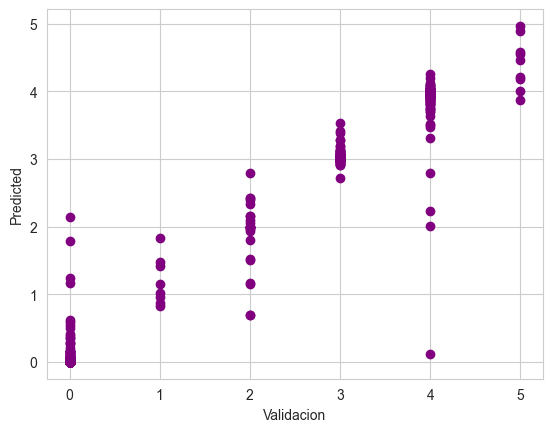

In [47]:

plt.scatter(y_v, predicted, color ='purple')
plt.xlabel('Validacion')
plt.ylabel('Predicted')
plt.show()


Text(0.5, 0, 'Random Forest Feature Importance')

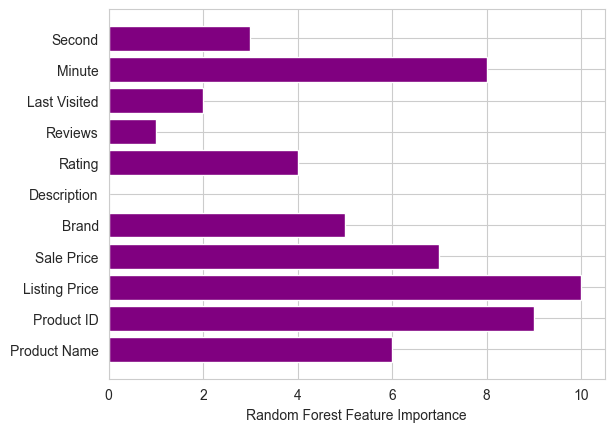

In [39]:
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': model.feature_importances_, 'importances': model.feature_importances_ })
cols = ['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Brand', 'Description', 'Rating', 'Reviews', 'Last Visited', 'Minute',
       'Second']
       
plt.barh(cols, model.feature_importances_.argsort(), color='purple')

plt.xlabel("Random Forest Feature Importance")

##### reducir overfiting

In [52]:
n_classes = 4

particions = [0.5, 0.7, 0.8]


Y = dataset["Discount"].values
X = dataset.drop(['Discount', 'Description', 'Reviews', 'Last Visited'], axis = 1).values

#VAMOS A QUITAR LOS ATRIBUTOS QUE NO SE TIENEN EN CUENTA


for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, Y, train_size=part)# Initiatlize the model
    #RandomForest
    #Creem el regresor
    model = RandomForestRegressor(n_estimators = 100, random_state = 0)  

    # l'entrenem
    model.fit(x_t, y_t)
    score = model.score(x_v, y_v)
    print ("Score RandomForest ", part, "% of the data: ", model.score(x_v, y_v))

    predicted = model.predict(x_v)
    print("The accuracy of Random Forest is : ", accuracy_score(y_v, predicted.round())*100, "%")

Score RandomForest  0.5 % of the data:  0.9776908020174938
The accuracy of Random Forest is :  94.4920440636475 %
Score RandomForest  0.7 % of the data:  0.990883389652141
The accuracy of Random Forest is :  97.34964322120285 %
Score RandomForest  0.8 % of the data:  0.9936084949432065
The accuracy of Random Forest is :  98.47094801223241 %


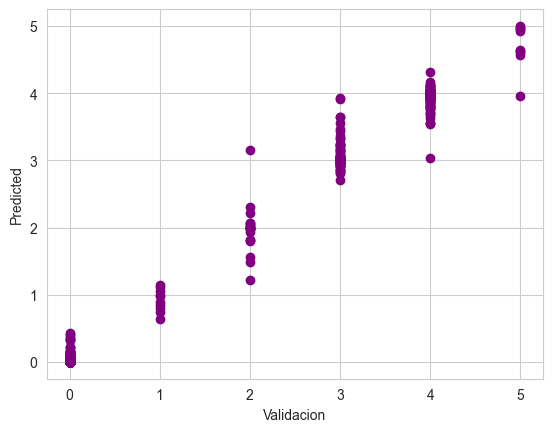

In [53]:

plt.scatter(y_v, predicted, color ='purple')
plt.xlabel('Validacion')
plt.ylabel('Predicted')
plt.show()

#### Sobre conjunto test

In [54]:
n_classes = 4

particions = [0.5, 0.7, 0.8]

Y = dataset["Discount"].values
X = dataset.drop(['Discount'], axis = 1).values

#VAMOS A QUITAR LOS ATRIBUTOS QUE NO SE TIENEN EN CUENTA

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, Y, train_size=part)# Initiatlize the model
    #RandomForest
    #Creem el regresor
    model = RandomForestRegressor(n_estimators = 100, random_state = 0)  

    # l'entrenem
    model.fit(x_v, y_v)
    score = model.score(x_t, y_t)
    print ("Score RandomForest ", part, "% of the data: ", model.score(x_t, y_t))

    predicted = model.predict(x_t)
    print("The accuracy of Random Forest is : ", accuracy_score(y_t, predicted.round())*100, "%")

Score RandomForest  0.5 % of the data:  0.9716716617554999
The accuracy of Random Forest is :  91.79926560587516 %
Score RandomForest  0.7 % of the data:  0.9570737770919755
The accuracy of Random Forest is :  88.5439440314823 %
Score RandomForest  0.8 % of the data:  0.9337045817917982
The accuracy of Random Forest is :  85.53940321346595 %


In [81]:
r2_score(y_t, predicted)

0.9127953022122536

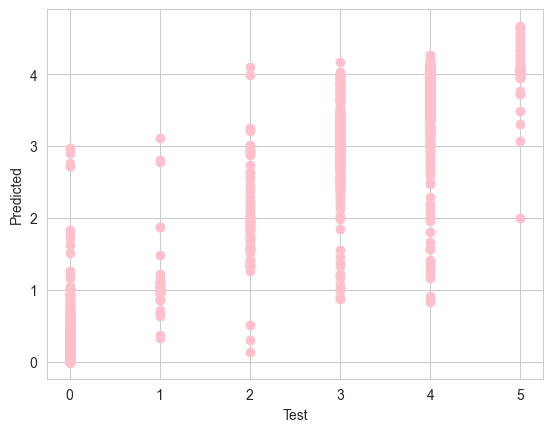

In [55]:
plt.scatter(y_t, predicted, color ='pink')
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.show()


Text(0.5, 0, 'Random Forest Feature Importance')

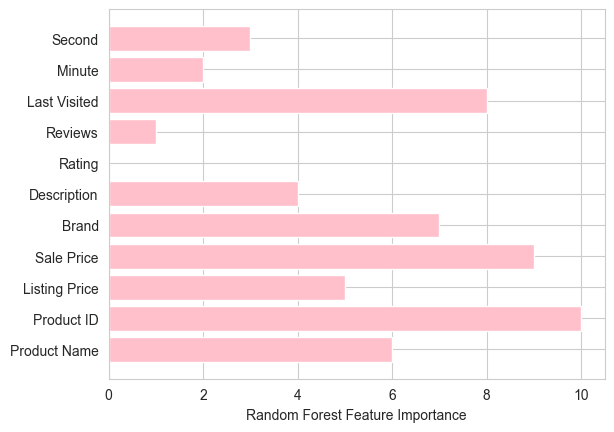

In [56]:
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': model.feature_importances_, 'importances': model.feature_importances_ })
cols = ['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Brand', 'Description', 'Rating', 'Reviews', 'Last Visited', 'Minute',
       'Second']
       
plt.barh(cols, model.feature_importances_.argsort(), color='pink')

plt.xlabel("Random Forest Feature Importance")

### Reducir overfiting

In [62]:
n_classes = 4

particions = [0.5]

Y = dataset["Discount"].values
X = dataset.drop(['Discount', 'Rating', 'Reviews', 'Minute', 'Second', 'Description'], axis = 1).values

#VAMOS A QUITAR LOS ATRIBUTOS QUE NO SE TIENEN EN CUENTA

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, Y, train_size=part)# Initiatlize the model
    #RandomForest
    #Creem el regresor
    model = RandomForestRegressor(n_estimators = 100, random_state = 0)  

    # l'entrenem
    model.fit(x_v, y_v)
    score = model.score(x_t, y_t)
    print ("Score RandomForest ", part, "% of the data: ", model.score(x_t, y_t))

    predicted = model.predict(x_t)
    print("The accuracy of Random Forest is : ", accuracy_score(y_t, predicted.round())*100, "%")

Score RandomForest  0.5 % of the data:  0.9647640969650356
The accuracy of Random Forest is :  93.26805385556915 %


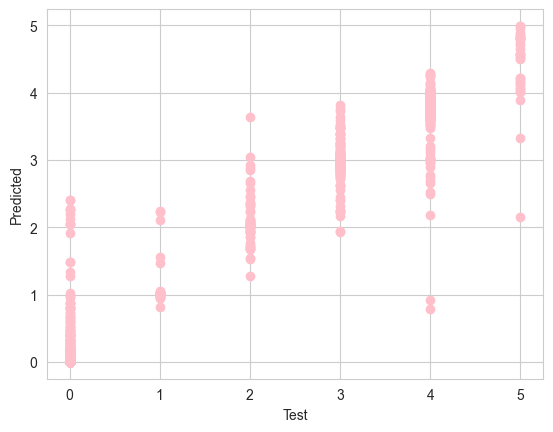

In [63]:
plt.scatter(y_t, predicted, color ='pink')
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.show()


### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

n_classes = 4

Y = dataset["Discount"].values
X = dataset.drop(['Discount'], axis = 1).values


# Holdout Set
X_train, X_aux, Y_train, Y_aux = train_test_split(X, Y, train_size=0.6)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_aux, Y_aux, test_size=0.5)

particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, Y, train_size=part)# Initiatlize the model
    #RandomForest
    #Creem el regresor
    model = RandomForestClassifier(n_estimators = 100, random_state = 0)  

    # l'entrenem
    model.fit(x_t, y_t)
    score = model.score(x_v, y_v)
    print ("Score RandomForest ", part, "% of the data: ", model.score(x_v, y_v))

    predicted = model.predict(x_v)
    probs = model.predict_proba(x_v)
    print("The accuracy of Random Forest is : ", accuracy_score(y_v, predicted.round())*100, "%")

Score RandomForest  0.5 % of the data:  0.9332925336597307
The accuracy of Random Forest is :  93.32925336597307 %
Score RandomForest  0.7 % of the data:  0.9306829765545361
The accuracy of Random Forest is :  93.06829765545362 %
Score RandomForest  0.8 % of the data:  0.9327217125382263
The accuracy of Random Forest is :  93.27217125382263 %


### Curvas PR y ROC de RF Classifier

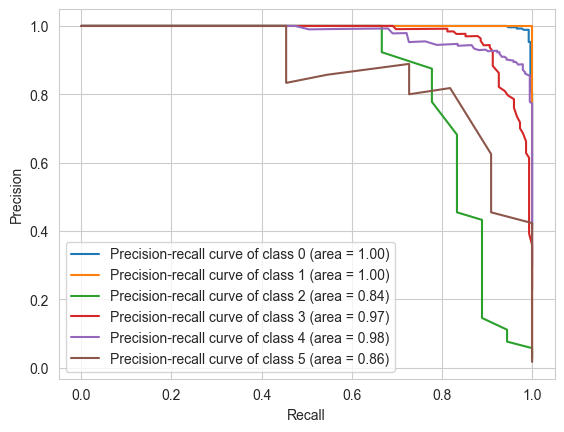

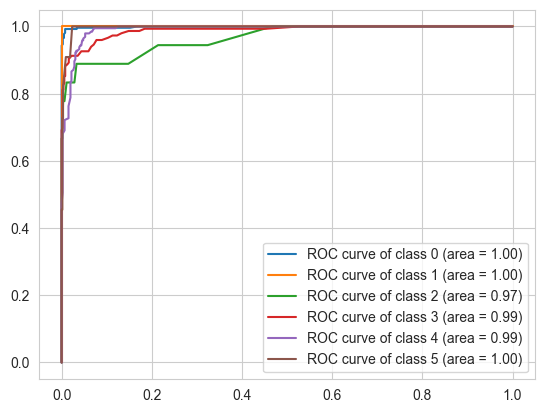

In [39]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

n_classes = 6

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="lower left")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

### SVC

Correct classification SVM       0.5 % of the data:  0.9351285189718482
Correct classification SVM       0.7 % of the data:  0.9255861365953109
Correct classification SVM       0.8 % of the data:  0.9373088685015291


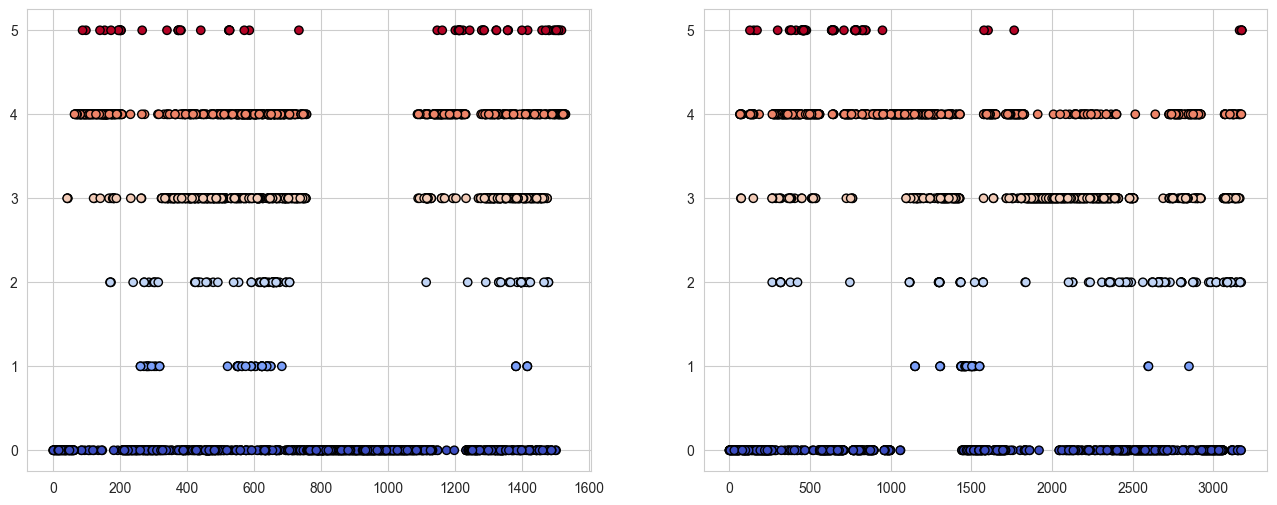

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

#Y = dataset["Sale Price"].values
y = dataset["Discount"].values
#X = dataset.drop(['Sale Price'], axis = 1).values
X = dataset.drop(['Discount'], axis = 1).values

n_classes = 6

fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')


particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
       
    #Creem el regresor logístic
    kernel1 = ['poly', 'rbf', 'sigmoid']
    C1 = [50, 10, 1.0, 0.1, 0.01]
    svc = svm.SVC(C=10000, kernel='poly', gamma='scale', probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))


## PCA

In [110]:
from sklearn.preprocessing import StandardScaler
features = dataset.columns
# Separating out the features
x = dataset.loc[:, features].values
# Separating out the target
y = dataset.loc[:,['Discount']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

              PC1         PC2         PC3  D
0    -1419.196162  764.120595  581.079905  4
1     1601.175806  729.595590  530.078317  4
2     -158.428569 -591.956329  688.594440  3
3    -1120.722567  363.665620  694.161884  4
4      151.645853 -758.612012  568.928803  4
...           ...         ...         ... ..
3263  -819.201501  -69.542371 -739.490248  0
3264 -1477.344878 -208.313535  230.049370  0
3265 -1359.069853 -481.682975  186.048777  0
3266 -1492.867433 -109.474655   80.132777  0
3267  -547.019399  876.009598  210.111738  0

[3268 rows x 4 columns]


<AxesSubplot: title={'center': 'PCA'}>

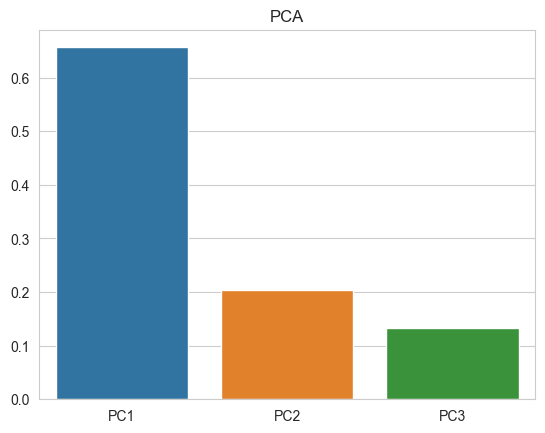

In [111]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=42)
X = dataset.drop(['Discount'], axis = 1).values

principalComponents = pca.fit_transform(X)
#principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf = pd.DataFrame({'PC1' : principalComponents[:,0], 'PC2' : principalComponents[:,1], 'PC3' : principalComponents[:,2], 'D' : dataset["Discount"]})
#finalDf = pd.concat([principalDf, dataset[['Discount']]], axis = 1)
print(principalDf)
pca.explained_variance_ratio_
pca.explained_variance_ratio_.sum()

plt.figure()
plt.title("PCA")
sns.barplot(x=['PC1', 'PC2', 'PC3'], y=pca.explained_variance_ratio_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


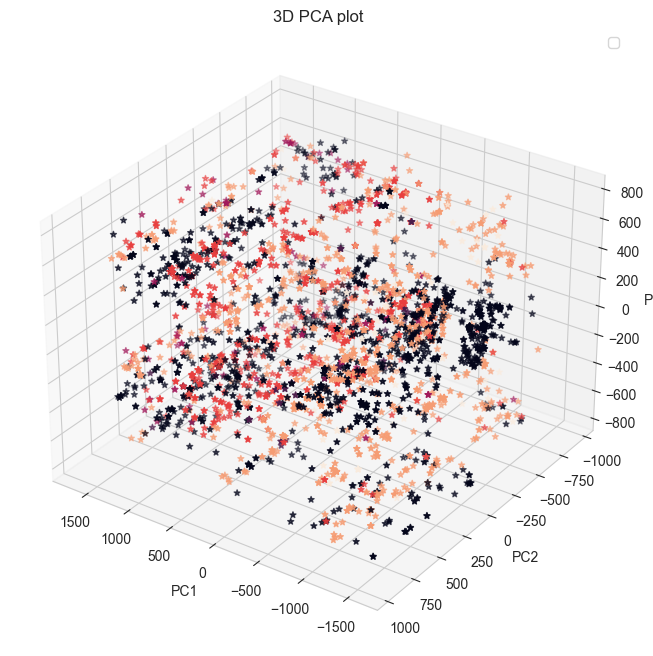

In [118]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, 
                     projection='3d')

x=principalDf['PC1']
y=principalDf['PC2']
z=principalDf['PC3']
colores = np.array(["purple", "pink", "violet", "blue"])

ax.scatter(x, y, z, marker='*', c = dataset['Discount'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(30, 125)
ax.legend()
plt.title("3D PCA plot")
plt.show()

## Cross Validation

#### En este caso, no hace falta hacer cross validation ya que he obtenido valores de accuracy muy altos